In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from tokenizers import Tokenizer
import sys

import matplotlib.pyplot as plt
import numpy as np
import collections

In [ ]:
sys.path.append("../../")

from ChEmbed.data import chembldb, datasets, chembed_tokenizer

In [ ]:
def load_encoded_chembl(encode_slice = slice(0, 50000)):
    tokenizer = Tokenizer.from_file("../data/tokenizers/tokenizer-chembldb-16-06-2025.json")
    chembl = chembldb.ChemblDBChemreps()._load_or_download()
    chembl_smiles = chembldb.ChemblDBChemreps()._preprocess(chembl)
    chembl_encoded = tokenizer.encode(chembl_smiles[encode_slice])

    return chembl_encoded

In [25]:
chembl_encoded = load_encoded_chembl()
counter = collections.Counter(chembl_encoded.tokens)
token_freqs = sorted(counter.items(), key = lambda x: x[1], reverse=True)

In [26]:
print(token_freqs)

[('(', 5089), (')', 5087), ('C', 4789), ('@', 3852), ('O', 2791), ('[', 2706), (']', 2705), ('H', 2422), ('=', 2329), ('N', 1067), ('NC', 629), ('CC', 434), ('[EOM]', 320), ('OC', 162), ('CO', 149), ('CCC', 137), ('/', 99), ('CCCN', 94), ('c', 90), ('1', 87), ('cc1', 83), ('CCCCN', 81), ('nH', 75), ('CNC', 74), ('2', 74), ('-', 73), ('3', 64), ('CCCNC', 59), ('Cc1ccc', 52), ('Cc1ccccc1', 51), ('Cl', 50), ('4', 50), ('1C', 48), ('F', 48), ('Cc1c', 43), ('cc2', 43), ('6O', 42), ('3O', 41), ('c1', 40), ('cc', 38), ('2O', 38), ('C2', 35), ('NCC', 34), ('%', 34), ('Cc2ccccc2', 33), ('5', 33), ('2C', 33), ('CCCC', 30), ('CN', 30), ('NC1', 28), ('.', 28), ('c2ccc', 26), ('8', 26), ('CC1', 25), ('1CCCN1C', 25), ('C3', 24), ('c2ccccc12', 24), ('1O', 24), ('C1', 24), ('4O', 23), ('\\', 21), ('COC', 21), ('c3', 21), ('c1ccc', 21), ('S', 21), ('CCN', 21), ('c2', 20), ('Cc2ccc', 20), ('6', 20), ('+', 20), ('cc3', 20), ('c2ccccc2', 20), ('7O', 19), ('7', 18), ('cn1', 17), ('N1CCC', 16), ('Cc2c', 16)

In [27]:
freqs = [freq[1] for freq in token_freqs]

## Do the tokens of our learned tokenizer follow a Zipfian distribution?

We can qualitatively examine if the tokens of our learned tokenizer follow a Zipfian distribution by plotting the frequency of each token against its rank in the sorted list of tokens. This is a common characteristic of natural language, where a small number of tokens are very common, while the majority are rare, but it's not exactly a given that this is true for a tokenizer derived entirely from chemical SMILES strings.

## Notes on common tokens

Surprisingly, the tokens of our learned tokenizer do follow zipfs law, at least roughly. Ignoring puncutation for the time-being, the most common token is the single character "C", which represents carbon, and the second most common token is "O", which represents oxygen. These are followed by other common elements in organic chemistry, such as "N" for nitrogen and "H" for hydrogen. We can also see interesting patterns such as "c1ccccc1", which is the SMILES representation of benzene. 

For the least common tokens, we see the occasional occurence of rarer elements such as "P" for phosphorus, "S" for sulfur, and "F" for fluorine. While these do occur in pharmacologically relevant compounds, they are less common than the more ubiquitous elements like carbon, oxygen, and nitrogen.

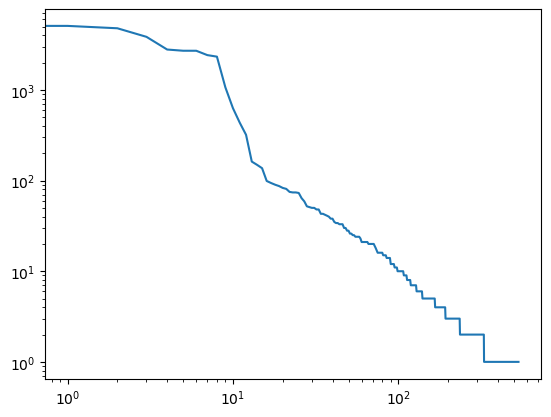

In [28]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.plot(freqs)
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
smilesdataset = datasets.SMILESDataset(
    smiles_list = chembldb.ChemblDBChemreps()._load_or_download()["canonical_smiles"].tolist(),
    tokenizer = Tokenizer.from_file("../data/tokenizers/tokenizer-chembldb-16-06-2025.json"),
)

In [55]:
smilesdataset[0]

TypeError: Tokenizer.encode() got an unexpected keyword argument 'truncation'